<a href="https://colab.research.google.com/github/mohsenSarvariHero/PythonFirst/blob/main/Q15_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Population Mean: 1.2716, Population Std Dev: 0.5576
Sampling Distribution - Mean: 1.2736, Std Dev: 0.1054
Min: 0.8749, Max: 1.6513
Q1: 1.2017, Median: 1.2698, Q3: 1.3397


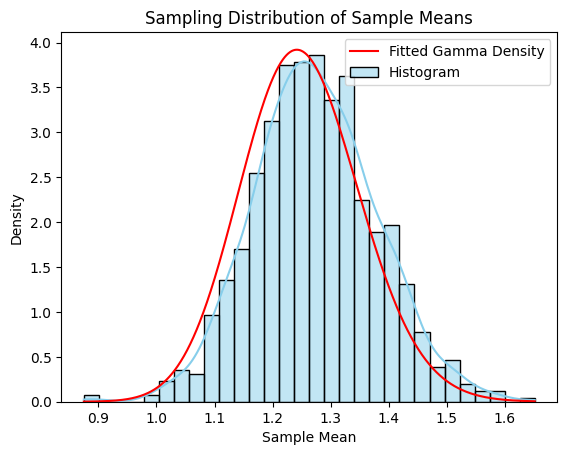

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma

# Step 1: Calculate Population Statistics
np.random.seed(1234)
dist = np.random.gamma(5, 1/4, 5000)  # Gamma(r=5, scale=1/λ=4), population size 5000
pop_mean = np.mean(dist)
pop_std = np.std(dist)
print(f"Population Mean: {pop_mean:.4f}, Population Std Dev: {pop_std:.4f}")

# Step 2: Simulate Sampling Distribution
n = 30  # Sample size for each sample
m = 1000  # Number of samples to simulate
sampling_means = [np.mean(np.random.choice(dist, size=n, replace=True)) for _ in range(m)]

# Step 3: Analyze Sampling Distribution
sampling_mean = np.mean(sampling_means)
sampling_std = np.std(sampling_means)
q1, median, q3 = np.percentile(sampling_means, [25, 50, 75])
sampling_min = np.min(sampling_means)
sampling_max = np.max(sampling_means)

print(f"Sampling Distribution - Mean: {sampling_mean:.4f}, Std Dev: {sampling_std:.4f}")
print(f"Min: {sampling_min:.4f}, Max: {sampling_max:.4f}")
print(f"Q1: {q1:.4f}, Median: {median:.4f}, Q3: {q3:.4f}")

# Step 4: Plot Sampling Distribution with Fitted Density
sns.histplot(sampling_means, bins=30, kde=True, color="skyblue", stat="density", label="Histogram")
x = np.linspace(min(sampling_means), max(sampling_means), 1000)
theoretical_pdf = gamma.pdf(x, a=n*5, scale=1/(n*4))  # Gamma(n*r, n*λ)
plt.plot(x, theoretical_pdf, "r-", label="Fitted Gamma Density")

plt.title("Sampling Distribution of Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.legend()
plt.show()



Sample (n=200) - Mean: 1.2423, Std Dev: 0.5878
Min: 0.2770, Max: 3.3381
Q1: 0.7554, Median: 1.1747, Q3: 1.5750


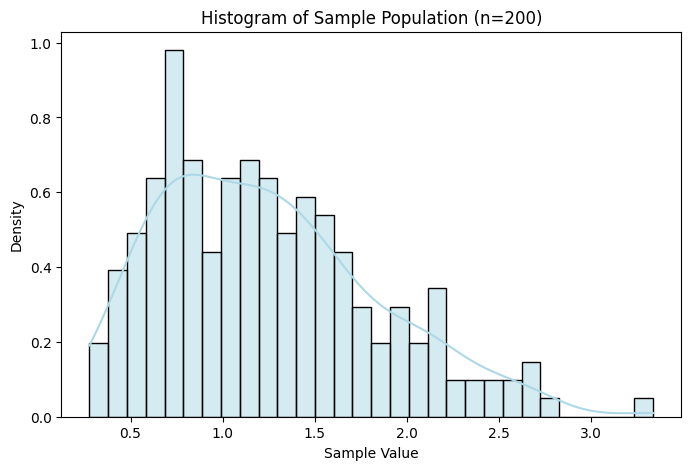

Bootstrap (n=200) - Mean: 1.2406, Std Dev: 0.0414
10th Percentile: 1.1900, 90th Percentile: 1.2939


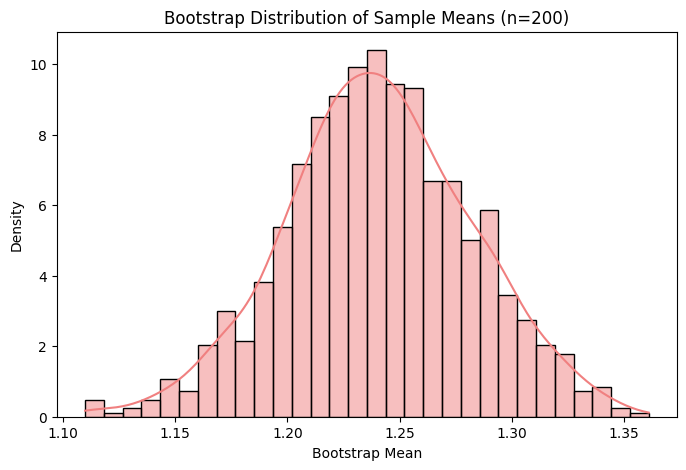

Bootstrap (n=50) - Mean: 1.2435, Std Dev: 0.0814
10th Percentile: 1.1447, 90th Percentile: 1.3476


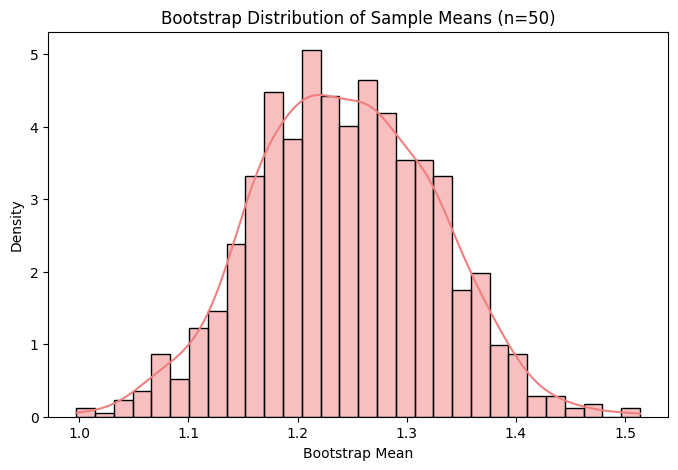

Bootstrap (n=10) - Mean: 1.2462, Std Dev: 0.1977
10th Percentile: 0.9933, 90th Percentile: 1.4877


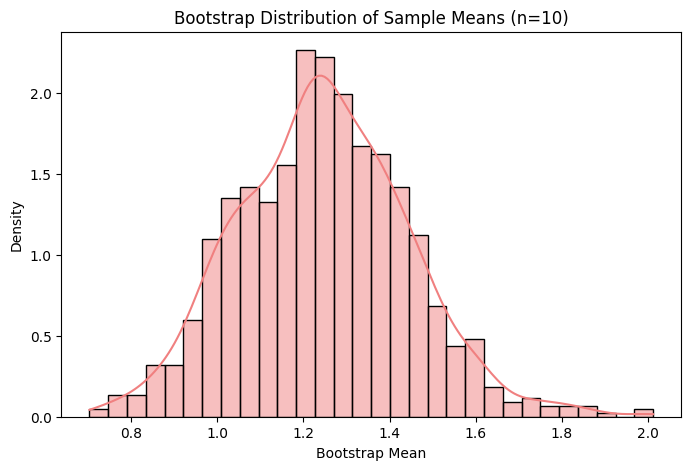


Quantile Comparison Table:
         Sample Size  10th Percentile  90th Percentile
0   Original (n=200)         0.560104         2.080522
1  Bootstrap (n=200)         1.189968         1.293912
2   Bootstrap (n=50)         1.144709         1.347612
3   Bootstrap (n=10)         0.993308         1.487681


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma

# Step (iii): Create a Random Sample of Size 200
np.random.seed(1234)
sample_size = 200
sample_200 = np.random.choice(dist, size=sample_size, replace=False)

# Compute statistics
sample_mean = np.mean(sample_200)
sample_std = np.std(sample_200)
sample_min = np.min(sample_200)
sample_max = np.max(sample_200)
q1, median, q3 = np.percentile(sample_200, [25, 50, 75])

print(f"Sample (n=200) - Mean: {sample_mean:.4f}, Std Dev: {sample_std:.4f}")
print(f"Min: {sample_min:.4f}, Max: {sample_max:.4f}")
print(f"Q1: {q1:.4f}, Median: {median:.4f}, Q3: {q3:.4f}")

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(sample_200, bins=30, kde=True, color="lightblue", stat="density")
plt.title("Histogram of Sample Population (n=200)")
plt.xlabel("Sample Value")
plt.ylabel("Density")
plt.show()

# Step (iv): Bootstrap Resampling with Replacement
def bootstrap_means(sample, B=1000, n_bootstrap=200):
    """Perform bootstrapping to create a distribution of sample means."""
    boot_means = [np.mean(np.random.choice(sample, size=n_bootstrap, replace=True)) for _ in range(B)]
    return np.array(boot_means)

# Create bootstrap distributions for n=200, n=50, n=10
bootstrap_sizes = [200, 50, 10]
bootstrap_results = {}

for n in bootstrap_sizes:
    boot_means = bootstrap_means(sample_200, B=1000, n_bootstrap=n)
    bootstrap_results[n] = boot_means

    # Compute 10th and 90th percentiles
    q10, q90 = np.percentile(boot_means, [10, 90])

    print(f"Bootstrap (n={n}) - Mean: {np.mean(boot_means):.4f}, Std Dev: {np.std(boot_means):.4f}")
    print(f"10th Percentile: {q10:.4f}, 90th Percentile: {q90:.4f}")

    # Plot histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(boot_means, bins=30, kde=True, color="lightcoral", stat="density")
    plt.title(f"Bootstrap Distribution of Sample Means (n={n})")
    plt.xlabel("Bootstrap Mean")
    plt.ylabel("Density")
    plt.show()

# Compare Percentiles in a Table
import pandas as pd

comparison_table = pd.DataFrame({
    "Sample Size": ["Original (n=200)"] + [f"Bootstrap (n={n})" for n in bootstrap_sizes],
    "10th Percentile": [np.percentile(sample_200, 10)] + [np.percentile(bootstrap_results[n], 10) for n in bootstrap_sizes],
    "90th Percentile": [np.percentile(sample_200, 90)] + [np.percentile(bootstrap_results[n], 90) for n in bootstrap_sizes]
})

print("\nQuantile Comparison Table:")
print(comparison_table)
